<a href="https://colab.research.google.com/github/zaegeon/Python/blob/main/ML/20220629_ML15_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ANN(Artificial Neural Network, 인공신경망)

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

# tensorflow, keras
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__ # Google Colab에 설치된 Tensorflow 버전

'2.8.2'

In [3]:
keras.__version__ # Google Colab에 설치된 Keras 버전

'2.8.0'

# Iris 데이터 셋

In [4]:
data, target = datasets.load_iris(return_X_y = True)

In [5]:
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [6]:
target[:5]

array([0, 0, 0, 0, 0])

## petal_length, petal_width 변수만 선택한 이진 분류

In [7]:
X = data[:, 2:].copy()
y = (target != 0).astype('int').copy()

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### SGD Classifier

In [9]:
sgd = SGDClassifier(loss='log', n_jobs=-1, random_state=42)

In [10]:
sgd.fit(X, y)

SGDClassifier(loss='log', n_jobs=-1, random_state=42)

In [11]:
sgd.coef_

array([[9.29310825, 9.5046378 ]])

In [12]:
sgd.intercept_

array([-33.65502003])

In [13]:
pred_prob = sgd.predict_proba(X)
pred_prob[:5]

array([[9.99999993e-01, 7.23930287e-09],
       [9.99999993e-01, 7.23930287e-09],
       [9.99999997e-01, 2.85826298e-09],
       [9.99999982e-01, 1.83354387e-08],
       [9.99999993e-01, 7.23930287e-09]])

In [14]:
pred = sgd.predict(X)
pred[:5]

array([0, 0, 0, 0, 0])

In [15]:
np.mean(y == pred)

1.0

### Neural Network

In [16]:
# 신경망 모델 생성
model = keras.Sequential(layers=[keras.layers.Dense(units=1,               # hidden layer Node 수
                                                    activation='sigmoid',  # 활성함수
                                                    input_shape=(2, ))],   # 독립변수 개수
                         name='iris_binary_single_layer')

In [17]:
# 신경망 모델 요약 정보 : layers, parameters
model.summary()

Model: "iris_binary_single_layer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [18]:
# 신경망 모델 컴파일 : optimizer, loss(손실 함수), metrics(평가 점수 함수) 설정
model.compile(optimizer='sgd',
              loss=keras.losses.binary_crossentropy,
              metrics=keras.metrics.binary_accuracy)

In [19]:
# 신경망 훈련
model.fit(X, y, epochs=10, batch_size=1)

Epoch 1/10
150/150 [==============================] - 3s 4ms/step - loss: 0.5736 - binary_accuracy: 0.6067
Epoch 2/10
150/150 [==============================] - 0s 3ms/step - loss: 0.4402 - binary_accuracy: 0.6667
Epoch 3/10
150/150 [==============================] - 0s 3ms/step - loss: 0.4037 - binary_accuracy: 0.6667
Epoch 4/10
150/150 [==============================] - 1s 4ms/step - loss: 0.3712 - binary_accuracy: 0.6667
Epoch 5/10
150/150 [==============================] - 0s 3ms/step - loss: 0.3423 - binary_accuracy: 0.6800
Epoch 6/10
150/150 [==============================] - 1s 4ms/step - loss: 0.3152 - binary_accuracy: 0.7600
Epoch 7/10
150/150 [==============================] - 0s 3ms/step - loss: 0.2938 - binary_accuracy: 0.8067
Epoch 8/10
150/150 [==============================] - 0s 3ms/step - loss: 0.2738 - binary_accuracy: 0.9533
Epoch 9/10
150/150 [==============================] - 1s 4ms/step - loss: 0.2553 - binary_accuracy: 0.9800
Epoch 10/10
150/150 [================

In [20]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[0.8811966 ],
        [0.03100113]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([-1.6520957], dtype=float32)>]

In [21]:
pred = model.predict(X) # 이진 분류에서 predict()는 양성(1)이 될 확률
pred.shape

(150, 1)

In [22]:
pred[:5]

array([[0.39837986],
       [0.39837986],
       [0.37746084],
       [0.41967675],
       [0.39837986]], dtype=float32)

In [23]:
# 예측값(0 or 1)을 계산하기 위해서는 ＊확률 > 0.5＊ 비교해야 함.
pred_label = (pred > 0.5).astype('int').reshape((-1, ))
pred_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [24]:
np.mean(y == pred_label) # 정확도 : 실젯값과 예측값 비교

0.9866666666666667

## 모든 변수(sl, sw, pl, pw)를 사용한 이진 분류

In [25]:
X = data.copy()
# y = (target != 0).astype('int').copy()

### SGD

In [26]:
sgd = SGDClassifier(loss='log', n_jobs=-1, random_state=42, max_iter=10)

In [27]:
sgd.fit(X, y)

SGDClassifier(loss='log', max_iter=10, n_jobs=-1, random_state=42)

In [28]:
pred = sgd.predict(X) # 예측값(0 or 1)

In [29]:
np.mean(y == pred)

1.0

### Neural Network

In [30]:
model = keras.Sequential(layers=[keras.layers.Dense(units=1,
                                                    activation='sigmoid',
                                                    input_shape=(4,))])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer=keras.optimizers.SGD(),
              loss=keras.losses.binary_crossentropy,
              metrics=keras.metrics.binary_accuracy)

In [33]:
model.fit(X, y, batch_size=1, epochs=10)

Epoch 1/10
150/150 [==============================] - 1s 3ms/step - loss: 0.8464 - binary_accuracy: 0.5933
Epoch 2/10
150/150 [==============================] - 1s 3ms/step - loss: 0.3360 - binary_accuracy: 0.8867
Epoch 3/10
150/150 [==============================] - 0s 3ms/step - loss: 0.1843 - binary_accuracy: 0.9933
Epoch 4/10
150/150 [==============================] - 0s 3ms/step - loss: 0.1271 - binary_accuracy: 1.0000
Epoch 5/10
150/150 [==============================] - 1s 4ms/step - loss: 0.0969 - binary_accuracy: 1.0000
Epoch 6/10
150/150 [==============================] - 0s 3ms/step - loss: 0.0787 - binary_accuracy: 1.0000
Epoch 7/10
150/150 [==============================] - 0s 3ms/step - loss: 0.0664 - binary_accuracy: 1.0000
Epoch 8/10
150/150 [==============================] - 0s 3ms/step - loss: 0.0567 - binary_accuracy: 1.0000
Epoch 9/10
150/150 [==============================] - 1s 4ms/step - loss: 0.0508 - binary_accuracy: 1.0000
Epoch 10/10
150/150 [================

In [34]:
# 신경망이 학습 데이터를 훈련하면 가중치들을 찾음.
model.weights

[<tf.Variable 'dense_1/kernel:0' shape=(4, 1) dtype=float32, numpy=
 array([[-0.08057658],
        [-1.2953609 ],
        [ 1.5915805 ],
        [ 0.6151149 ]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([-0.3449899], dtype=float32)>]

In [35]:
pred = model.predict(X)
pred[:5]

array([[0.05028484],
       [0.0932433 ],
       [0.06435768],
       [0.09789219],
       [0.04479042]], dtype=float32)

In [36]:
pred_label = (pred > 0.5).astype('int').reshape((-1,))
pred_label[:5]

array([0, 0, 0, 0, 0])

In [37]:
np.mean(y == pred_label)  # 훈련 셋 정확도

1.0

## Iris 다중 클래스 분류

In [156]:
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [157]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### SGD Classifier

In [159]:
sgd = SGDClassifier(loss='log', max_iter=10, n_jobs=-1, random_state=42)

In [160]:
sgd.fit(X=data, y=target)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


SGDClassifier(loss='log', max_iter=10, n_jobs=-1, random_state=42)

In [161]:
sgd.coef_  # (n_classes, n_features)

array([[   7.32064421,   13.17715959,  -27.57442655,  -12.68911664],
       [  51.85595122, -145.56864647,   40.12103144, -111.8071359 ],
       [-122.62126983, -110.20331528,  189.91857208,  159.89458444]])

In [162]:
sgd.intercept_

array([   4.97012943,   87.73116955, -122.93221386])

In [163]:
# 훈련 셋 예측 확률
pred_prob = sgd.predict_proba(X=data)
pred_prob[:5]

array([[1.00000000e+00, 2.34871875e-54, 0.00000000e+00],
       [1.00000000e+00, 2.99578244e-27, 0.00000000e+00],
       [1.00000000e+00, 3.85472447e-46, 0.00000000e+00],
       [1.00000000e+00, 1.38277811e-38, 0.00000000e+00],
       [1.00000000e+00, 6.26310478e-63, 0.00000000e+00]])

In [164]:
pred_prob[-5:]

array([[4.79904210e-35, 1.80385537e-22, 1.00000000e+00],
       [7.02140712e-35, 5.00000000e-01, 5.00000000e-01],
       [4.99499990e-34, 2.08553589e-12, 1.00000000e+00],
       [9.67207569e-37, 1.55894047e-55, 1.00000000e+00],
       [1.23211445e-33, 5.96727101e-18, 1.00000000e+00]])

In [165]:
pred_target = np.argmax(pred_prob, axis=1)
pred_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2])

In [169]:
np.mean(target == pred_target)

0.8733333333333333

In [166]:
pred_label = sgd.predict(X=data)
pred_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [167]:
np.mean(target == pred_label)

0.9333333333333333

### NN

In [170]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=3,
                             activation=keras.activations.softmax,
                             input_shape=(4,)))

In [171]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 3)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [172]:
model.compile(optimizer=keras.optimizers.SGD(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=keras.metrics.sparse_categorical_accuracy)
# optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='...'

In [173]:
model.fit(x=data, y=target, batch_size=1, epochs=10)

Epoch 1/10
150/150 [==============================] - 0s 2ms/step - loss: 0.9975 - sparse_categorical_accuracy: 0.5533
Epoch 2/10
150/150 [==============================] - 0s 2ms/step - loss: 0.6793 - sparse_categorical_accuracy: 0.6667
Epoch 3/10
150/150 [==============================] - 0s 2ms/step - loss: 0.5976 - sparse_categorical_accuracy: 0.6867
Epoch 4/10
150/150 [==============================] - 0s 2ms/step - loss: 0.5348 - sparse_categorical_accuracy: 0.7200
Epoch 5/10
150/150 [==============================] - 0s 2ms/step - loss: 0.4933 - sparse_categorical_accuracy: 0.7667
Epoch 6/10
150/150 [==============================] - 0s 2ms/step - loss: 0.4693 - sparse_categorical_accuracy: 0.7667
Epoch 7/10
150/150 [==============================] - 0s 2ms/step - loss: 0.4280 - sparse_categorical_accuracy: 0.7933
Epoch 8/10
150/150 [==============================] - 0s 2ms/step - loss: 0.4079 - sparse_categorical_accuracy: 0.8133
Epoch 9/10
150/150 [============================

In [174]:
# 신경망 모델이 훈련을 통해서 찾은 가중치 : (n_inputs, n_units) & (n_units,)
model.weights

[<tf.Variable 'dense_26/kernel:0' shape=(4, 3) dtype=float32, numpy=
 array([[-0.36465174, -0.0349853 , -0.5350403 ],
        [ 1.5644417 , -0.21448012, -1.381727  ],
        [-1.6385518 , -0.31259605,  0.600194  ],
        [-0.48637643, -0.03981762,  1.0587455 ]], dtype=float32)>,
 <tf.Variable 'dense_26/bias:0' shape=(3,) dtype=float32, numpy=array([ 0.17249429,  0.24549456, -0.41798848], dtype=float32)>]

In [175]:
# 다중 클래스 분류 신경망 모델의 predict() : 각 클래스가 될 확률들  
pred = model.predict(x=data)

In [176]:
pred[:5]

array([[9.2575639e-01, 7.4019872e-02, 2.2376131e-04],
       [8.4511352e-01, 1.5396442e-01, 9.2205225e-04],
       [9.0484792e-01, 9.4699055e-02, 4.5298864e-04],
       [8.6297071e-01, 1.3610609e-01, 9.2323753e-04],
       [9.3902123e-01, 6.0806815e-02, 1.7195426e-04]], dtype=float32)

In [177]:
pred.shape # 신경망에서 최종 output의 shape

(150, 3)

In [179]:
pred_label = np.argmax(pred, axis=1)
pred_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1])

# Fashion MNIST datasets

In [58]:
(X_tr, y_tr), (X_te, y_te) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [59]:
X_tr.shape, y_tr.shape

((60000, 28, 28), (60000,))

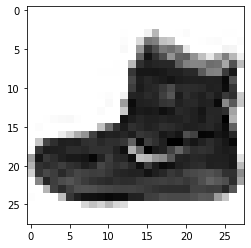

In [60]:
img = X_tr[0]
plt.imshow(img, cmap='binary')
plt.show()

In [61]:
y_tr[0]

9

In [62]:
np.unique(y_tr, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

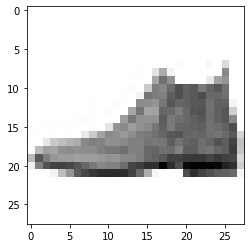

In [63]:
img = X_te[0]
plt.imshow(img, cmap='binary')
plt.show()

In [64]:
y_te[0]

9

In [65]:
np.unique(y_te, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

In [66]:
def plot_fashion_mnist(arr, ncols=10):
    n = len(arr)        # arr의 원소의 개수, 샘플의 개수
    nrows = int(np.ceil(n / ncols)) # subplot의 row 개수
    fig, ax = plt.subplots(nrows, ncols, figsize=(10, 10))
    for i in range(nrows):
        for j in range(ncols):
            idx = i * ncols + j # arr에서 선택할 샘플의 인덱스
            if nrows == 1 or ncols == 1:    # ax가 1차원 배열인 경우
                if idx < n:
                    ax[idx].imshow(arr[idx], cmap=plt.cm.binary)
                ax[idx].axis('off')
            else:                           # ax가 2차원 배열인 경우
                if idx < n:
                    ax[i, j].imshow(arr[idx], cmap=plt.cm.binary)
                ax[i, j].axis('off')
    plt.show()

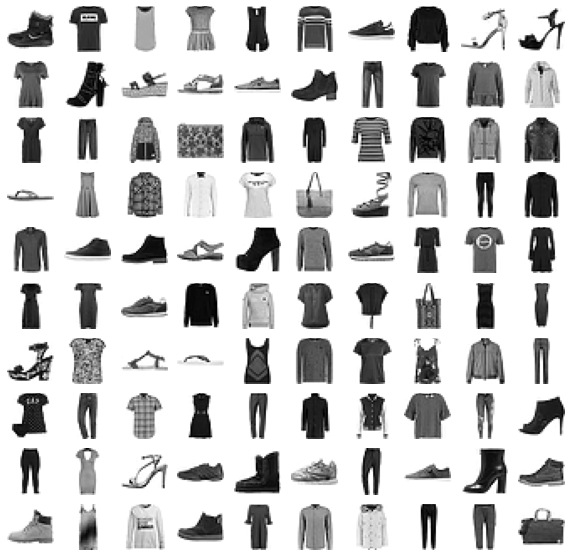

In [67]:
plot_fashion_mnist(X_tr[:100])

데이터 셋 전처리 :

훈련 셋과 테스트 셋은 0 ~ 255 스케일 → 0 ~ 1 스케일로 변환.

In [68]:
X_tr_scaled = X_tr / 255
X_te_scaled = X_te / 255

훈련 셋을 훈련/검증 셋으로 분리

In [69]:
tr_data, val_data, tr_target, val_target = train_test_split(X_tr_scaled, y_tr,
                                                            test_size=0.2, 
                                                            random_state=42,
                                                            stratify=y_tr)

In [70]:
tr_data = tr_data.reshape((48000, -1))   # (48000, 28, 28) → (48000, 784)
val_data = val_data.reshape((12000, -1)) # (12000, 28, 28) → (12000, 784)

## SGD Classifier

In [71]:
sgd = SGDClassifier(loss='log', max_iter=10, n_jobs=-1, random_state=42)

In [72]:
sgd.fit(tr_data, tr_target)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


SGDClassifier(loss='log', max_iter=10, n_jobs=-1, random_state=42)

In [73]:
# 훈련 결과로 찾은 계수들(coefficients)과 절편들(intercepts)
sgd.coef_.shape, sgd.intercept_.shape # (n_classes, n_features), (n_classes,)

((10, 784), (10,))

In [74]:
# 훈련 셋 예측 확률
tr_prob = sgd.predict_proba(tr_data)
tr_prob[:5]

array([[3.46103829e-03, 1.98675755e-06, 4.82667555e-01, 5.02729471e-05,
        5.48912955e-04, 3.15719188e-12, 5.03987179e-01, 2.65192156e-18,
        9.28305521e-03, 3.96124972e-35],
       [7.55523103e-01, 3.54977754e-05, 3.87606154e-05, 1.08699705e-05,
        5.89136288e-03, 1.79628081e-19, 2.37639589e-01, 9.02758217e-16,
        8.60816116e-04, 2.98418435e-33],
       [7.97566128e-04, 1.45330661e-04, 4.22729884e-04, 9.60294932e-01,
        1.55868192e-06, 2.10671858e-13, 3.83331593e-02, 3.59903550e-06,
        1.12473819e-06, 3.41043524e-27],
       [1.25158255e-02, 1.15572089e-02, 3.29383853e-03, 9.72464894e-01,
        3.91064660e-06, 2.34330697e-08, 1.12412979e-04, 6.58855217e-08,
        5.18206161e-05, 3.69130082e-23],
       [9.55929510e-01, 3.04957677e-07, 2.88578564e-02, 2.67622081e-09,
        3.14834992e-09, 5.39027905e-22, 1.38535303e-02, 3.00496410e-16,
        1.35879227e-03, 6.54101447e-22]])

In [75]:
tr_pred = sgd.predict(tr_data)
tr_pred[:5]

array([6, 0, 3, 3, 0], dtype=uint8)

In [76]:
# 훈련 셋에서의 정확도
sgd.score(tr_data, tr_target)

0.8447291666666666

In [77]:
# 검증 셋에서의 정확도
sgd.score(val_data, val_target)

0.8380833333333333

## Neural Network

In [78]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=10,
                             activation=keras.activations.softmax,
                             input_shape=(784,)))

In [79]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [80]:
model.compile(optimizer=keras.optimizers.SGD(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=keras.metrics.sparse_categorical_accuracy)

In [81]:
model.fit(tr_data, tr_target, epochs=10)
# batch_size = None일 때, batch_size의 기본값은 32.

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8768 - sparse_categorical_accuracy: 0.7192
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6217 - sparse_categorical_accuracy: 0.7974
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5663 - sparse_categorical_accuracy: 0.8150
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5368 - sparse_categorical_accuracy: 0.8234
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5172 - sparse_categorical_accuracy: 0.8279
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5031 - sparse_categorical_accuracy: 0.8328
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4927 - sparse_categorical_accuracy: 0.8349
Epoch 8/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4838 - sparse_categorical_accuracy: 0.8372
Epoch 9/10
1500/1500 [==========

In [82]:
model.weights[0].shape

TensorShape([784, 10])

In [83]:
model.weights[1].shape

TensorShape([10])

In [84]:
model.evaluate(tr_data, tr_target)

1500/1500 [==============================] - 4s 3ms/step - loss: 0.4696 - sparse_categorical_accuracy: 0.8407


[0.4696374833583832, 0.840666651725769]

In [85]:
model.evaluate(val_data, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.4611 - sparse_categorical_accuracy: 0.8436


[0.46111705899238586, 0.843583345413208]

## Deep Neural Network(심층 신경망)

* Deep learing: DNN을 훈련시키는 머신 러닝 학습 방법.

* layer를 2개 이상 연결하는 신경망을 만들 경우:

    * 첫번째 layer에서만 input_shape을 지정하면 됨.
        * 두번째 layer부터는 그 이전 layer의 출력의 개수(unit의 개수)가 input_shape이 됨.
    * 마지막 layer(출력층)를 제외한 중간 layer들의 units, activation 파라미터는 훈련을 통해서 최적의 값을 찾아야 하는 하이퍼 파라미터.
* 출력층의 units, activation 파라미터는 문제에 따라서 결정됨.
    * 이진 분류: units=1, activation='sigmoid'
    * 다중 클래스 분류: units=n_classes, activation='softmax'

In [86]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=100,
                             activation=keras.activations.sigmoid,
                             input_shape=(784,)))
model.add(keras.layers.Dense(units=10,
                             activation=keras.activations.softmax))
# input_shape 지정할 필요 X
# 첫 번째 layer에서만 input_shape을 지정하면 됨.
# 두 번째 layer부터는 그 이전 layer의 출력의 개수(unit의 개수)가 input_shape이 됨.

In [87]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.compile(optimizer=keras.optimizers.SGD(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=keras.metrics.sparse_categorical_accuracy)

In [89]:
model.fit(tr_data, tr_target, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 1.3739 - sparse_categorical_accuracy: 0.6390
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.8324 - sparse_categorical_accuracy: 0.7429
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7066 - sparse_categorical_accuracy: 0.7631
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6442 - sparse_categorical_accuracy: 0.7790
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6033 - sparse_categorical_accuracy: 0.7933
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5737 - sparse_categorical_accuracy: 0.8035
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5512 - sparse_categorical_accuracy: 0.8095
Epoch 8/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5335 - sparse_categorical_accuracy: 0.8153
Epoch 9/10
1500/1500 [==========

In [90]:
# 훈련 셋에서의 손실 & 정확도
model.evaluate(tr_data, tr_target)

1500/1500 [==============================] - 3s 2ms/step - loss: 0.5014 - sparse_categorical_accuracy: 0.8261


[0.5013630986213684, 0.8261041641235352]

In [91]:
# 테스트 셋에서의 손실 & 정확도
model.evaluate(val_data, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.4910 - sparse_categorical_accuracy: 0.8265


[0.4910455048084259, 0.8264999985694885]

# Activation Function(활성화 함수)

## sigmoid(logistic) 함수

$
\sigma(x) = \frac{1}{1+e^{-x}}
$

In [92]:
xvals = np.arange(-5, 5, 0.0001)

In [93]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

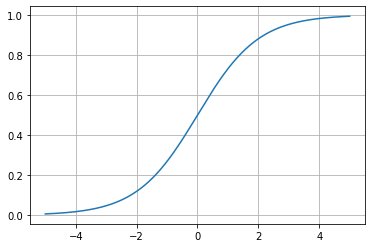

In [94]:
yvals = sigmoid(xvals)
plt.plot(xvals, yvals)
plt.grid()
plt.show()

## Hyperbolic tangent

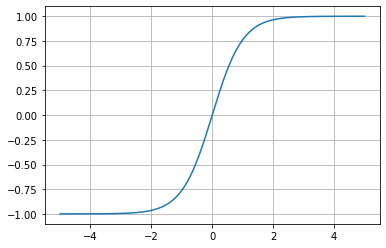

In [95]:
yvals = np.tanh(xvals)
plt.plot(xvals, yvals)
plt.grid()
plt.show()

## ReLU(Rectified Linear Unit)

$
\text{ReLU}(x) = 
\begin{cases}
    x & \text{for } x \ge 0 \\
    0 & \text{otherwise}
\end{cases}
$

In [96]:
def relu(x):
    return np.maximum(x, 0)

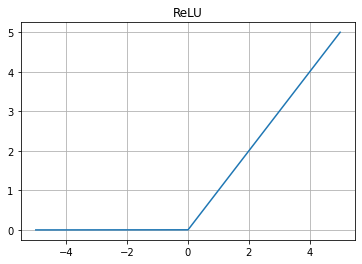

In [97]:
yvals = relu(xvals)
plt.plot(xvals, yvals)
plt.grid()
plt.title('ReLU')
plt.show()

## Leaky ReLU

$
\text{LeakyReLU}(x, \alpha) = 
\begin{cases} x & \text{for } x \geq 0\\
\alpha x & \text{otherwise}
\end{cases}
$

In [98]:
def leaky_relu(x, alpha=0.01):
    return np.maximum(x, alpha * x)

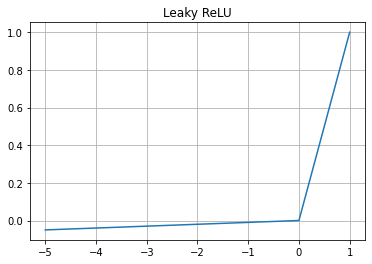

In [99]:
xvals = np.arange(-5, 2)
yvals = leaky_relu(xvals, alpha=0.01)
plt.plot(xvals, yvals)
plt.grid()
plt.title('Leaky ReLU')
plt.show()

## ELU(Exponential Linear Unit)

$
\text{ELU}(x, \alpha) = 
\begin{cases} x & \text{for  } x \geq 0 \\
\alpha (e^{x} - 1) & \text{otherwise}
\end{cases} 
$

In [100]:
def elu(x, alpha=1):
    return np.maximum(x, alpha * (np.exp(x) - 1))

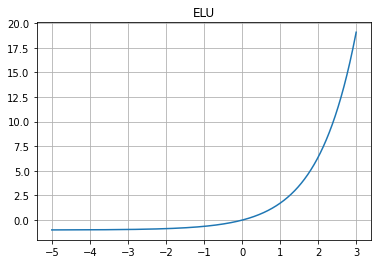

In [101]:
xvals = np.arange(-5, 3, 0.001)
yvals = elu(xvals)
plt.plot(xvals, yvals)
plt.grid()
plt.title('ELU')
plt.show()

Activation 함수 적용 : ELU → Leaky ReLU → ReLU → Logistic(sigmoid)

## 첫 번째 layer 활성화함수 : ELU

In [102]:
model = keras.Sequential()
# model.add(keras.layers.Flatten(input_shape=(28, 28))) # (28, 28) 모양의 2차원 배열 → (28*28,) 모양의 1차원 배열로 변환
# hidden layer(은닉층)
model.add(keras.layers.Dense(units=100,
                             activation=keras.activations.elu,
                             input_shape=(784,)))
# output layer(출력층)
model.add(keras.layers.Dense(units=10,
                             activation=keras.activations.softmax))

In [103]:
model.compile(optimizer=keras.optimizers.SGD(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=keras.metrics.sparse_categorical_accuracy)

In [104]:
model.fit(tr_data, tr_target, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7429 - sparse_categorical_accuracy: 0.7572
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5289 - sparse_categorical_accuracy: 0.8185
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4859 - sparse_categorical_accuracy: 0.8320
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4633 - sparse_categorical_accuracy: 0.8382
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4467 - sparse_categorical_accuracy: 0.8439
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4355 - sparse_categorical_accuracy: 0.8482
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4252 - sparse_categorical_accuracy: 0.8511
Epoch 8/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4168 - sparse_categorical_accuracy: 0.8540
Epoch 9/10
1500/1500 [==========

In [105]:
model.evaluate(tr_data, tr_target)

1500/1500 [==============================] - 3s 2ms/step - loss: 0.3991 - sparse_categorical_accuracy: 0.8596


[0.39910465478897095, 0.8596041798591614]

In [106]:
model.evaluate(val_data, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.4012 - sparse_categorical_accuracy: 0.8612


[0.40117236971855164, 0.8611666560173035]

## 첫 번째 layer 활성화함수 : Leaky ReLU

In [107]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=100,
                             activation='LeakyReLU',
                             input_shape=(784,)))
model.add(keras.layers.Dense(units=10,
                             activation=keras.activations.softmax))

In [108]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [109]:
model.compile(optimizer=keras.optimizers.SGD(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=keras.metrics.sparse_categorical_accuracy)

In [110]:
model.fit(tr_data, tr_target, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7961 - sparse_categorical_accuracy: 0.7390
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5411 - sparse_categorical_accuracy: 0.8174
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4945 - sparse_categorical_accuracy: 0.8295
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4693 - sparse_categorical_accuracy: 0.8366
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4528 - sparse_categorical_accuracy: 0.8435
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4396 - sparse_categorical_accuracy: 0.8472
Epoch 7/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4297 - sparse_categorical_accuracy: 0.8509
Epoch 8/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4202 - sparse_categorical_accuracy: 0.8536
Epoch 9/10
1500/1500 [==========

In [111]:
model.evaluate(tr_data, tr_target)

1500/1500 [==============================] - 3s 2ms/step - loss: 0.4048 - sparse_categorical_accuracy: 0.8594


[0.4047605097293854, 0.859375]

In [112]:
model.evaluate(val_data, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.4074 - sparse_categorical_accuracy: 0.8580


[0.4074051082134247, 0.8579999804496765]

In [113]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=100))
# Leaky Layer (activation)
model.add(keras.layers.LeakyReLU())
model.add(keras.layers.Dense(units=10,
                             activation=keras.activations.softmax))

In [114]:
model.compile(optimizer=keras.optimizers.SGD(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=keras.metrics.sparse_categorical_accuracy)

In [115]:
model.fit(tr_data, tr_target, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7788 - sparse_categorical_accuracy: 0.7498
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5400 - sparse_categorical_accuracy: 0.8188
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4941 - sparse_categorical_accuracy: 0.8308
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4689 - sparse_categorical_accuracy: 0.8399
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4510 - sparse_categorical_accuracy: 0.8441
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4385 - sparse_categorical_accuracy: 0.8487
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4276 - sparse_categorical_accuracy: 0.8524
Epoch 8/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4185 - sparse_categorical_accuracy: 0.8548
Epoch 9/10
1500/1500 [==========

In [116]:
model.evaluate(tr_data, tr_target)

1500/1500 [==============================] - 3s 2ms/step - loss: 0.3915 - sparse_categorical_accuracy: 0.8652


[0.39145156741142273, 0.8651666641235352]

In [117]:
model.evaluate(val_data, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3944 - sparse_categorical_accuracy: 0.8663


[0.39438357949256897, 0.8663333058357239]

# Optimizers

손실(비용, 목적)함수를 최적화하는 알고리즘.

* SGD → Momentum → Nesterov
* 적응형 학습(adaptive learning rate) : RMSProp, Adam(Adaptive Momentum), Nadam, AdaGrad, ...

In [118]:
# Flatten → Hidden layer(100, ELU) → Output layer(10, softmax)
def build_model():
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(units=100,
                                 activation=keras.activations.elu))
    model.add(keras.layers.Dense(units=10,
                                 activation=keras.activations.softmax))
    
    return model

In [119]:
tr_data, val_data, tr_target, val_target = train_test_split(X_tr_scaled, y_tr,
                                                            test_size=0.2, 
                                                            random_state=42,
                                                            stratify=y_tr)

In [120]:
model = build_model()
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


## RMSProp

In [121]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=keras.metrics.sparse_categorical_accuracy)
model.fit(tr_data, tr_target, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5265 - sparse_categorical_accuracy: 0.8125
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3981 - sparse_categorical_accuracy: 0.8564
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3602 - sparse_categorical_accuracy: 0.8686
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3369 - sparse_categorical_accuracy: 0.8777
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3190 - sparse_categorical_accuracy: 0.8836
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3062 - sparse_categorical_accuracy: 0.8874
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2941 - sparse_categorical_accuracy: 0.8942
Epoch 8/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2846 - sparse_categorical_accuracy: 0.8967
Epoch 9/10
1500/1500 [==========

In [122]:
model.evaluate(tr_data, tr_target)

1500/1500 [==============================] - 3s 2ms/step - loss: 0.2514 - sparse_categorical_accuracy: 0.9090


[0.25135013461112976, 0.9090208411216736]

In [123]:
model.evaluate(val_data, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3212 - sparse_categorical_accuracy: 0.8877


[0.32121285796165466, 0.887666642665863]

## Adam

In [124]:
model = build_model()
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=keras.metrics.sparse_categorical_accuracy)
model.fit(tr_data, tr_target, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5171 - sparse_categorical_accuracy: 0.8189
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3962 - sparse_categorical_accuracy: 0.8568
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3585 - sparse_categorical_accuracy: 0.8688
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3336 - sparse_categorical_accuracy: 0.8759
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3126 - sparse_categorical_accuracy: 0.8853
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2958 - sparse_categorical_accuracy: 0.8906
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2805 - sparse_categorical_accuracy: 0.8956
Epoch 8/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2693 - sparse_categorical_accuracy: 0.8996
Epoch 9/10
1500/1500 [==========

In [125]:
model.evaluate(tr_data, tr_target)

1500/1500 [==============================] - 3s 2ms/step - loss: 0.2365 - sparse_categorical_accuracy: 0.9105


[0.23650990426540375, 0.9104583263397217]

In [126]:
model.evaluate(val_data, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3160 - sparse_categorical_accuracy: 0.8878


[0.31595608592033386, 0.8878333568572998]

## 훈련 epoch 횟수에 따른 평가(손실, 정확도)

In [127]:
model = build_model()

In [128]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=keras.metrics.sparse_categorical_accuracy)

In [129]:
history = model.fit(x=tr_data, y=tr_target, epochs=20,
                    validation_data=(val_data, val_target))

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5262 - sparse_categorical_accuracy: 0.8121 - val_loss: 0.3956 - val_sparse_categorical_accuracy: 0.8616
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3955 - sparse_categorical_accuracy: 0.8579 - val_loss: 0.3737 - val_sparse_categorical_accuracy: 0.8681
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3593 - sparse_categorical_accuracy: 0.8700 - val_loss: 0.3454 - val_sparse_categorical_accuracy: 0.8773
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3379 - sparse_categorical_accuracy: 0.8758 - val_loss: 0.3475 - val_sparse_categorical_accuracy: 0.8781
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3208 - sparse_categorical_accuracy: 0.8834 - val_loss: 0.3390 - val_sparse_categorical_accuracy: 0.8789
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3074 - spars

In [130]:
type(history)

keras.callbacks.History

In [131]:
type(history.history) # history 객체의 history 속성(property)

dict

In [132]:
history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

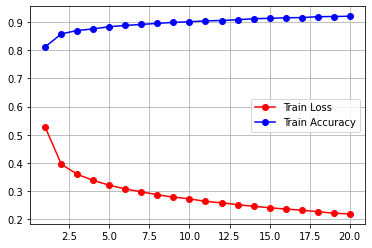

In [133]:
# 신경망 모델이 epoch마다 계산한 훈련 셋에서의 cross entropy
train_loss = history.history['loss']
# 신경망 모델이 epoch마다 계산한 훈련 셋에서의 정확도
train_acc = history.history['sparse_categorical_accuracy']

# 훈련 셋의 학습 곡선
epochs = np.arange(1, 21)
plt.plot(epochs, train_loss, 'ro-', label='Train Loss')
plt.plot(epochs, train_acc, 'bo-', label='Train Accuracy')
plt.grid()
plt.legend()

plt.show()

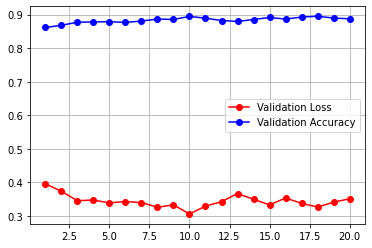

In [134]:
# 신경망 모델이 epoch마다 계산한 검증 셋에서의 손실
val_loss = history.history['val_loss']
# 신경망 모델이 epoch마다 계산한 검증 셋에서의 정확도
val_acc = history.history['val_sparse_categorical_accuracy']

# 검증 셋의 학습 곡선
epochs = np.arange(1, 21)
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.plot(epochs, val_acc, 'bo-', label='Validation Accuracy')
plt.grid()
plt.legend()

plt.show()

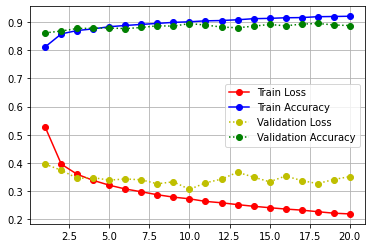

In [135]:
plt.plot(epochs, train_loss, 'ro-', label='Train Loss')
plt.plot(epochs, train_acc, 'bo-', label='Train Accuracy')

plt.plot(epochs, val_loss, 'yo:', label='Validation Loss')
plt.plot(epochs, val_acc, 'go:', label='Validation Accuracy')

plt.grid()
plt.legend()

plt.show()

# 규제 : Dropout

In [136]:
model = build_model()
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=keras.metrics.sparse_categorical_accuracy)
result_non_dropout = model.fit(tr_data, tr_target, epochs=20,
                               validation_data=(val_data, val_target))

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5132 - sparse_categorical_accuracy: 0.8181 - val_loss: 0.3959 - val_sparse_categorical_accuracy: 0.8566
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3921 - sparse_categorical_accuracy: 0.8577 - val_loss: 0.3844 - val_sparse_categorical_accuracy: 0.8631
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3531 - sparse_categorical_accuracy: 0.8708 - val_loss: 0.3665 - val_sparse_categorical_accuracy: 0.8678
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3281 - sparse_categorical_accuracy: 0.8780 - val_loss: 0.3275 - val_sparse_categorical_accuracy: 0.8799
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3076 - sparse_categorical_accuracy: 0.8863 - val_loss: 0.3169 - val_sparse_categorical_accuracy: 0.8854
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2913 - spars

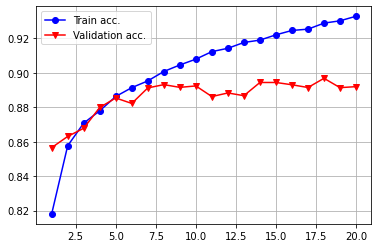

In [137]:
# epoch 변화에 따른 정확도 곡선
train_acc = result_non_dropout.history['sparse_categorical_accuracy']
val_acc = result_non_dropout.history['val_sparse_categorical_accuracy']

plt.plot(epochs, train_acc, 'bo-', label='Train acc.')
plt.plot(epochs, val_acc, 'rv-', label='Validation acc.')
plt.legend()
plt.grid()
plt.show()

In [138]:
def build_dropout_model():
    model = keras.Sequential()
    # flatten layer
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    # hidden layer
    model.add(keras.layers.Dense(units=100,
                                 activation=keras.activations.elu))
    # drop out layer
    model.add(keras.layers.Dropout(rate=0.3))
    # output layer
    model.add(keras.layers.Dense(units=10,
                                 activation=keras.activations.softmax))
    
    return model

In [139]:
model = build_dropout_model()
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_21 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [140]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=keras.metrics.sparse_categorical_accuracy)

In [141]:
result_dropout = model.fit(tr_data, tr_target, epochs=20,
                           validation_data=(val_data, val_target))

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5738 - sparse_categorical_accuracy: 0.7976 - val_loss: 0.4255 - val_sparse_categorical_accuracy: 0.8460
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4525 - sparse_categorical_accuracy: 0.8356 - val_loss: 0.4022 - val_sparse_categorical_accuracy: 0.8521
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4184 - sparse_categorical_accuracy: 0.8461 - val_loss: 0.3803 - val_sparse_categorical_accuracy: 0.8623
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3973 - sparse_categorical_accuracy: 0.8545 - val_loss: 0.3604 - val_sparse_categorical_accuracy: 0.8717
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3833 - sparse_categorical_accuracy: 0.8593 - val_loss: 0.3498 - val_sparse_categorical_accuracy: 0.8723
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3674 - spars

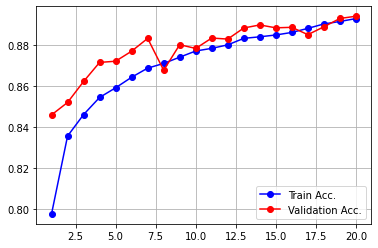

In [142]:
train_acc = result_dropout.history['sparse_categorical_accuracy']
val_acc = result_dropout.history['val_sparse_categorical_accuracy']

plt.plot(epochs, train_acc, 'bo-', label='Train Acc.')
plt.plot(epochs, val_acc, 'ro-', label='Validation Acc.')

plt.grid()
plt.legend()
plt.show()

# 훈련된 모델 저장과 복원

Google 세션에 저장하면, 세션이 만료됐을 때 저장된 파일은 삭제됨.

Google Drive를 마운트해서 저장하는 게 더 좋음.

In [143]:
# 훈련된 모델의 파라미터들만 저장
model.save_weights('dropout_model_weights.h5')

In [144]:
# 훈련된 모델을 저장
model.save('dropout_model.h5')

파라미터만 저장된 파일에서 모델을 복원하려면, 저장 당시의 모델과 동일한 모델을 먼저 생성한 후 파라미터를 load하면 됨.

In [145]:
model2 = build_dropout_model() # 저장된 파라미터와 동일한 모델 생성
model2.load_weights('dropout_model_weights.h5') # 생성된 모델에서 파라미터들을 로드

파라미터들만 로드한 경우에는 optimizer, loss, metrics 등이 compile되지 않은 상태이므로 evaluate를 호출할 수 없음.

In [146]:
pred_prob = model2.predict(val_data)        # 각 레이블이 될 확률
pred_label = np.argmax(pred_prob, axis=1)   # 예측값
pred_acc = np.mean(val_target == pred_label)# 정확도
pred_acc

0.89425

저장된 모델을 로드하는 경우 :

In [147]:
model3 = keras.models.load_model('dropout_model.h5')

In [148]:
model3.evaluate(val_data, val_target) # model load → evaluate OK.

375/375 [==============================] - 1s 2ms/step - loss: 0.3037 - sparse_categorical_accuracy: 0.8942


[0.3037395775318146, 0.8942499756813049]

# Early Stopping(조기 종료) Callback

In [149]:
model = build_dropout_model()
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=keras.metrics.sparse_categorical_accuracy)
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.h5')
early_stop_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
result = model.fit(x=tr_data, y=tr_target, epochs=100,
                   callbacks=[checkpoint_cb, early_stop_cb],
                   validation_data=(val_data, val_target))

Epoch 1/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5781 - sparse_categorical_accuracy: 0.7957 - val_loss: 0.4148 - val_sparse_categorical_accuracy: 0.8547
Epoch 2/100
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4485 - sparse_categorical_accuracy: 0.8403 - val_loss: 0.3842 - val_sparse_categorical_accuracy: 0.8611
Epoch 3/100
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4152 - sparse_categorical_accuracy: 0.8505 - val_loss: 0.3602 - val_sparse_categorical_accuracy: 0.8684
Epoch 4/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3936 - sparse_categorical_accuracy: 0.8556 - val_loss: 0.3576 - val_sparse_categorical_accuracy: 0.8708
Epoch 5/100
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3748 - sparse_categorical_accuracy: 0.8623 - val_loss: 0.3451 - val_sparse_categorical_accuracy: 0.8740
Epoch 6/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3644 -

In [150]:
early_stop_cb.stopped_epoch

15

In [151]:
train_loss = result.history['loss']
val_loss = result.history['val_loss']

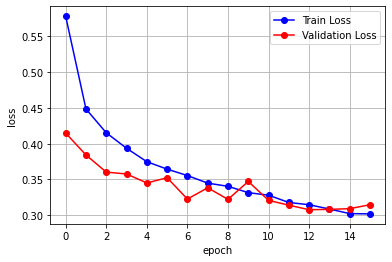

In [152]:
plt.plot(train_loss, 'bo-', label='Train Loss')
plt.plot(val_loss, 'ro-', label='Validation Loss')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()